In [1]:
import numpy as np
import pickle

In [2]:
with open("C:/Users/OWO/Documents/AA_CODE/@Projects/Projects/ai_0009_cnn_CIFAR10/cifar-10-batches-py/batches.meta", 'rb') as file:
    meta = pickle.load(file, encoding='bytes')

In [11]:
print(meta)

{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


{b'num_cases_per_batch': 10000,   // this is num of data  
b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'],  this is num of class
 b'num_vis': 3072}  this is num of visable data which is 32x32x3 //32x32 is the pixcel and 3 is RGB

The transpose method takes as input a tuple of axes and rearranges the dimensions of the array according to the order specified in the tuple. In this case, the tuple (0, 2, 3, 1) specifies that the first dimension should remain in the first position, the second dimension should be moved to the second position, the third dimension should be moved to the third position, and the fourth dimension should be moved to the fourth position.

In [3]:
def load_batch(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        X = data[b'data']
        Y = data[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y
    
x_train = []
y_train = []

for i in range(1, 6):
    file = "C:/Users/OWO/Documents/AA_CODE/@Projects/Projects/ai_0009_cnn_CIFAR10/cifar-10-batches-py/data_batch_" + str(i)
    X, Y = load_batch(file)
    x_train.append(X)
    y_train.append(Y)
    
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)


In [4]:
file = "C:/Users/OWO/Documents/AA_CODE/@Projects/Projects/ai_0009_cnn_CIFAR10/cifar-10-batches-py/test_batch"
x_test, y_test = load_batch(file)


In [7]:
print(x_train.shape)
print(y_train)

(50000, 32, 32, 3)
[6 9 9 ... 9 1 1]


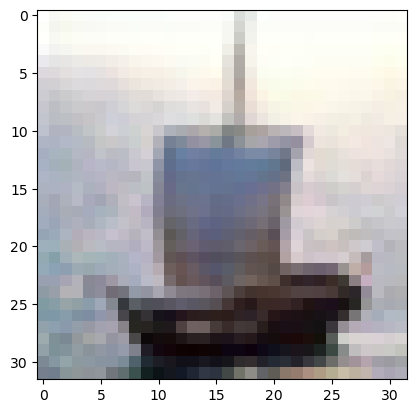

In [27]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
# Load the data
with open("C:/Users/OWO/Documents/AA_CODE/@Projects/Projects/ai_0009_cnn_CIFAR10/cifar-10-batches-py/data_batch_1", "rb") as file:
    data = pickle.load(file, encoding="bytes")

# Preprocess the data
images = data[b'data']
labels = data[b'labels']
images = images.reshape(len(images), 3, 32, 32)
images = images.transpose(0, 2, 3, 1)

# Display the image
rannum = random.randrange(0,10000)
plt.imshow(images[rannum])
plt.show()